Task 1 - Profile table for Baltimore911 dataset with required fields.

In [9]:
import pandas as pd
import numpy as np

# Specify data types for problematic columns (replace 'your_dataset.csv' and column names as needed)
column_data_types = {
    'ColumnName1': str,  # Replace 'ColumnName1' with the actual column name
    'ColumnName2': str,  # Replace 'ColumnName2' with the actual column name
    # Add more columns as needed
}

# Load your dataset into a Pandas DataFrame with specified data types and low_memory=False
df = pd.read_csv('./Baltimore911.csv', dtype=column_data_types, low_memory=False)

# Get the total number of rows and columns
num_rows, num_cols = df.shape

print(f"Total number of call instances/rows: {num_rows}")
print(f"Total number of call features/columns: {num_cols}")
print("")
print("Profile Table:")

# Initialize an empty list to store the profile information
profile_data = []

# Loop through each column in the dataset
for column_name in df.columns:
    column_data = df[column_name]
    
    # Determine the data type
    data_type = str(column_data.dtype)
    
    # Calculate statistics based on data type
    if np.issubdtype(column_data, np.number):
        min_val = column_data.min()
        max_val = column_data.max()
        mean_val = column_data.mean()
        median_val = column_data.median()
        std_dev = column_data.std()
        unique_values = len(column_data.unique())  # Numeric columns don't have unique values
        top_3_values = column_data.value_counts().head(3).to_dict()  # Numeric columns don't have top values
    else:
        min_val = None  # Non-numeric columns don't have min values
        max_val = None  # Non-numeric columns don't have max values
        mean_val = None  # Non-numeric columns don't have mean values
        median_val = None  # Non-numeric columns don't have median values
        std_dev = None  # Non-numeric columns don't have standard deviation
        unique_values = len(column_data.unique())
        top_3_values = column_data.value_counts().head(3).to_dict()
    
    # Calculate missingness
    missingness_percentage = (column_data.isnull().sum() / num_rows) * 100
    
    # Add information to the profile data list
    profile_data.append([column_name, data_type, min_val, max_val, mean_val, median_val, std_dev, unique_values, top_3_values, missingness_percentage])

# Create a DataFrame from the profile data
profile_table = pd.DataFrame(profile_data, columns=['Column Name', 'Data Type', 'Min', 'Max', 'Mean', 'Median', 'Std Dev', 'Unique Values', 'Top 3 Values', 'Missingness (%)'])

# Display the profile table
print(profile_table)


Total number of call instances/rows: 292761
Total number of call features/columns: 16

Profile Table:
        Column Name Data Type        Min        Max       Mean     Median  \
0         CrimeDate    object        NaN        NaN        NaN        NaN   
1         CrimeTime    object        NaN        NaN        NaN        NaN   
2         CrimeCode    object        NaN        NaN        NaN        NaN   
3          Location    object        NaN        NaN        NaN        NaN   
4       Description    object        NaN        NaN        NaN        NaN   
5    Inside/Outside    object        NaN        NaN        NaN        NaN   
6            Weapon    object        NaN        NaN        NaN        NaN   
7              Post    object        NaN        NaN        NaN        NaN   
8          District    object        NaN        NaN        NaN        NaN   
9      Neighborhood    object        NaN        NaN        NaN        NaN   
10        Longitude   float64 -81.529189 -76.383228

Comments:

- First of all, maximum number of crime took place at Northeast district near Downtown.
- Most number of incidents happened at 6'o clock & 5'o clock in evening.
- Particularly 1500 RUSSELL ST is the dangerous area of the Baltimore followed by 3500 BOSTON ST.
- Larceny is the common crime of the Baltimore and mostly happened at street.
- Every record has only 1 total incidents. That means particular kind of incident happened only 1 time at particular location.
- In dataset, we have a lot of crimes that had actually taken place but we don't know have enough information.

Task 2 - Series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations.

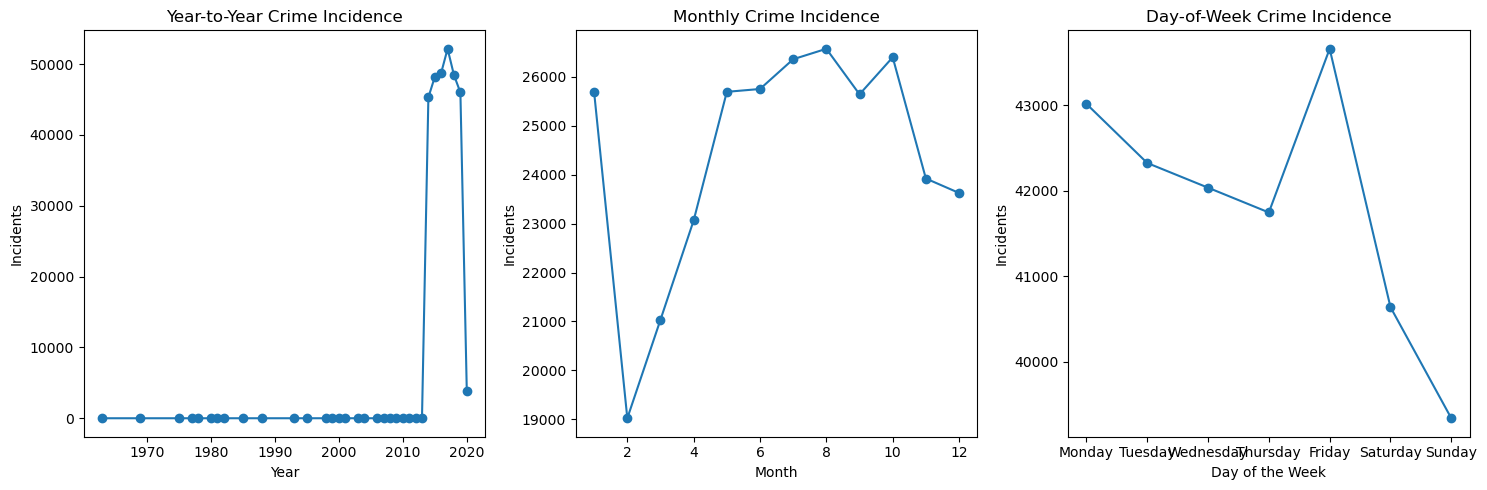

In [10]:
import matplotlib.pyplot as plt

# Preprocess the data to extract temporal information
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek

# Group the data by year, month, and day of the week and count incidents
yearly_counts = df.groupby('Year')['Total Incidents'].count()
monthly_counts = df.groupby('Month')['Total Incidents'].count()
day_of_week_counts = df.groupby('DayOfWeek')['Total Incidents'].count()

# Create subplots for each temporal pattern
plt.figure(figsize=(15, 5))

# Year-to-year pattern
plt.subplot(131)
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Year-to-Year Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Incidents')

# Monthly pattern
plt.subplot(132)
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Monthly Crime Incidence')
plt.xlabel('Month')
plt.ylabel('Incidents')

# Day-of-week pattern
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.subplot(133)
plt.plot(days, day_of_week_counts.values, marker='o')
plt.title('Day-of-Week Crime Incidence')
plt.xlabel('Day of the Week')
plt.ylabel('Incidents')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Task 3 -  Plot shows distribution of crime type aggregating from all geo-locations and all time periods.

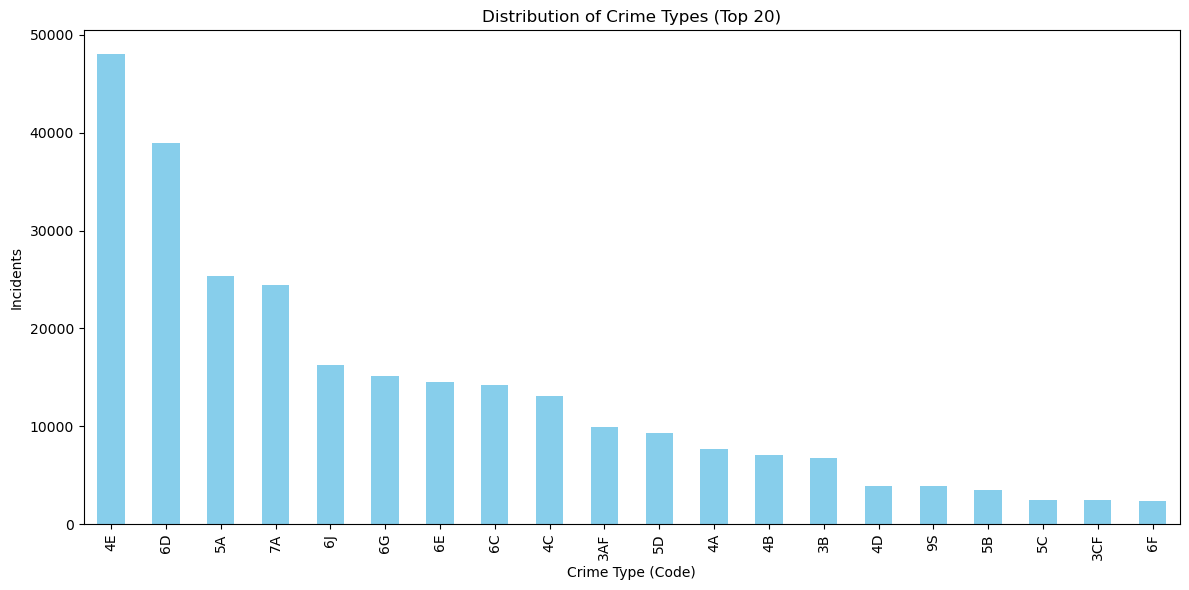

In [11]:
# Group the data by crime type and count incidents
crime_type_counts = df.groupby('CrimeCode')['Total Incidents'].count()

# Sort the crime types by incident count in descending order
crime_type_counts = crime_type_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
crime_type_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Distribution of Crime Types (Top 20)')
plt.xlabel('Crime Type (Code)')
plt.ylabel('Incidents')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

Task 4 - Series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations.

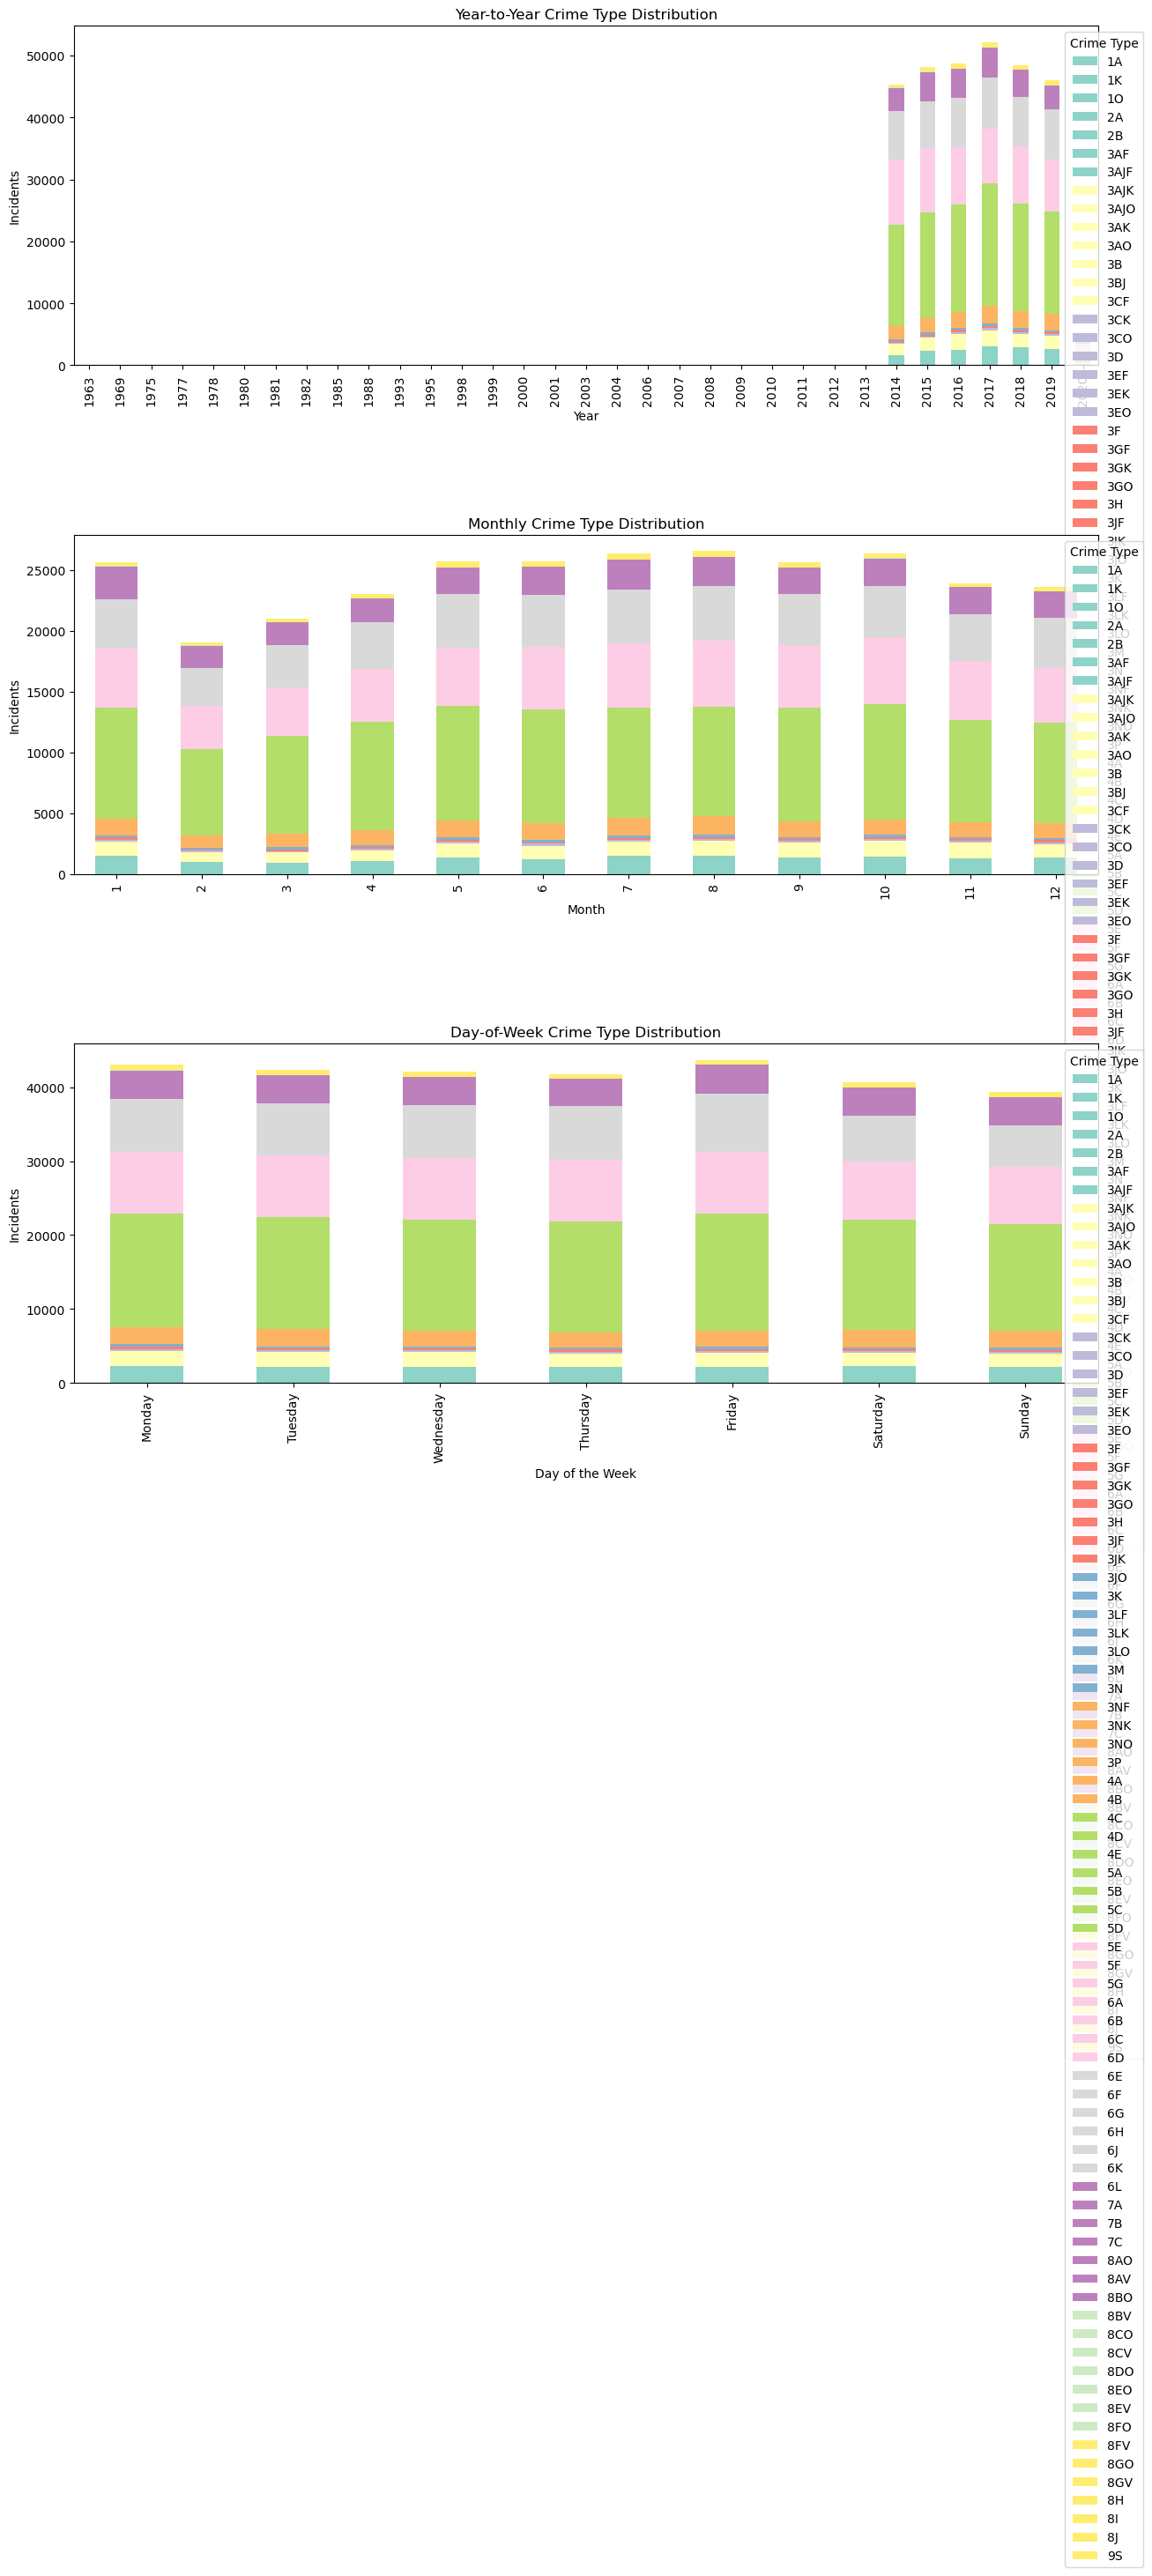

In [12]:
# Preprocess the data to extract temporal information
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek

# Group the data by year, month, and day of the week and count incidents for each crime type
yearly_counts = df.groupby(['Year', 'CrimeCode'])['Total Incidents'].count()
monthly_counts = df.groupby(['Month', 'CrimeCode'])['Total Incidents'].count()
day_of_week_counts = df.groupby(['DayOfWeek', 'CrimeCode'])['Total Incidents'].count()

# Create subplots for each temporal pattern
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Year-to-year pattern
yearly_counts.unstack().plot(ax=axs[0], kind='bar', stacked=True, cmap='Set3')
axs[0].set_title('Year-to-Year Crime Type Distribution')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Incidents')
axs[0].legend(title='Crime Type', loc='upper right', bbox_to_anchor=(1.05, 1))

# Monthly pattern
monthly_counts.unstack().plot(ax=axs[1], kind='bar', stacked=True, cmap='Set3')
axs[1].set_title('Monthly Crime Type Distribution')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Incidents')
axs[1].legend(title='Crime Type', loc='upper right', bbox_to_anchor=(1.05, 1))

# Day-of-week pattern
day_of_week_counts.unstack().plot(ax=axs[2], kind='bar', stacked=True, cmap='Set3')
axs[2].set_title('Day-of-Week Crime Type Distribution')
axs[2].set_xlabel('Day of the Week')
axs[2].set_ylabel('Incidents')
axs[2].set_xticks(range(7))
axs[2].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axs[2].legend(title='Crime Type', loc='upper right', bbox_to_anchor=(1.05, 1))

# Adjust subplot spacing and figure size
plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.show()


Task 5 - Dashboard to explore the spatial and temporal patterns of crime.

In [13]:
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Remove null values from the 'Neighborhood' column
df = df.dropna(subset=['Neighborhood'])

# Create a Dash app
app = Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Crime Pattern Exploration Dashboard"),
    
    # Dropdown for selecting location
    dcc.Dropdown(
        id='location-dropdown',
        options=[
            {'label': location, 'value': location}
            for location in df['Neighborhood'].unique()
        ],
        value=df['Neighborhood'].iloc[0],
        multi=False
    ),
    
    # Scatter plot for spatial exploration
    dcc.Graph(id='spatial-pattern'),

    # Range slider for temporal exploration
    dcc.RangeSlider(
        id='date-slider',
        min=df['CrimeDate'].min().year,
        max=df['CrimeDate'].max().year,
        step=1,
        marks={str(year): str(year) for year in range(df['CrimeDate'].min().year, df['CrimeDate'].max().year + 1)},
        value=[df['CrimeDate'].min().year, df['CrimeDate'].max().year]
    ),

    # Line plot for temporal exploration
    dcc.Graph(id='temporal-pattern'),
])

# Define callback for updating spatial plot
@app.callback(
    Output('spatial-pattern', 'figure'),
    [Input('location-dropdown', 'value')]
)
def update_spatial_plot(selected_location):
    filtered_df = df[df['Neighborhood'] == selected_location]
    fig = px.scatter_mapbox(
        filtered_df,
        lat='Latitude',
        lon='Longitude',
        hover_name='CrimeCode',
        zoom=12,
    )
    fig.update_layout(
        mapbox_style="carto-positron",
        mapbox_zoom=12,
    )
    return fig

# Define callback for updating temporal plot
@app.callback(
    Output('temporal-pattern', 'figure'),
    [Input('date-slider', 'value')]
)
def update_temporal_plot(selected_years):
    filtered_df = df[(df['CrimeDate'].dt.year >= selected_years[0]) & (df['CrimeDate'].dt.year <= selected_years[1])]
    crime_counts = filtered_df.groupby(['Year', 'CrimeCode']).size().reset_index(name='Counts')
    fig = px.line(
        crime_counts,
        x='Year',
        y='Counts',
        color='CrimeCode',
        labels={'Year': 'Year', 'Counts': 'Incidents'},
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
